In [1]:
import tensorflow
from tensorflow import keras
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras import Input, Model
from keras.optimizers import Adam
from keras.metrics import CategoricalAccuracy
from keras.utils import plot_model
from keras.layers import Dense, GlobalAveragePooling2D
import scipy

In [14]:
data_train=ImageDataGenerator(rescale=1./255,
                             brightness_range=[0.4,1.5],
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,                            
                             height_shift_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)
data_validation=ImageDataGenerator()

train_set=data_train.flow_from_directory(r'E:\Machine-Learning\train-20230708T064821Z-001\train',
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        class_mode='categorical',
                                        batch_size=32,
                                        save_to_dir='E:\Machine-Learning\Augmented_data',
                                        save_format='png',
                                        save_prefix='aug')
val_set=data_validation.flow_from_directory(r'E:\Machine-Learning\validation-20230708T064826Z-001\validation',
                                           target_size=(224,224),
                                           color_mode='rgb',
                                           class_mode='categorical',
                                           batch_size=32)

Found 4533 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [15]:
print("Training classes and their indies: {}".format(train_set.class_indices))
print("Training classes and their indies: {}".format(val_set.class_indices))
print('Training classes and their indices:',format(train_set.samples))

Training classes and their indies: {'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
Training classes and their indies: {'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
Training classes and their indices: 4533


In [16]:
def showdatadistribution()->None:
    plt.bar(['Training Samples','Validation Sample'],
           [train_set.samples,val_set.samples],
           align='center',
           color=['green','red'])
    plt.ylabel('Number of Images')
    plt.title('Data Distribution')
    for index in range(2):
        x=['Training Samples','Validation Sample']
        y=[train_set.samples,val_set.samples]
        plt.text(x=x[index],
                 y=y[index],
                 s=str(y[index]),
                 ha='center',
                 bbox=dict(facecolor='yellow',alpha=0.8))


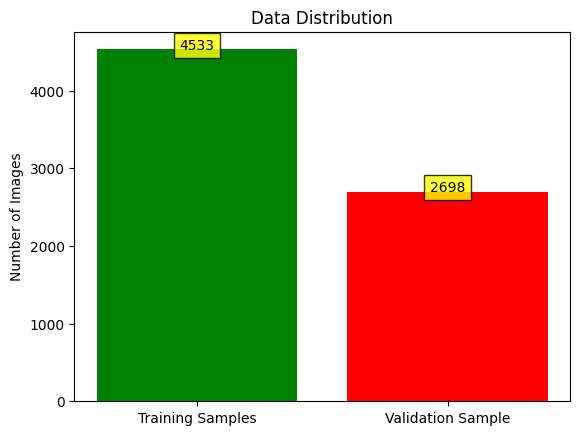

In [6]:
showdatadistribution()

In [17]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(224,224,3)
                   )

In [8]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
base_model.trainable = False

In [18]:
input_layer = Input(shape=(224,224,3))
output_base_model = base_model(input_layer, training=False)
global_pooling = GlobalAveragePooling2D()(output_base_model)
dense_one = Dense(64, activation='relu')(global_pooling)
dense_two = Dense(32, activation='relu')(dense_one)
dense_three = Dense(16, activation='relu')(dense_two)
output_layer = Dense(6, activation='softmax')(dense_three)

model = Model(input_layer,output_layer)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=CategoricalAccuracy(name='accuracy'))

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_4 (Dense)             (None, 64)                32832     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                           

In [20]:
plot_model(model,
           show_shapes=True,
           show_layer_names=True,
           show_layer_activations=True,
           expand_nested=True,
           to_file=(r'C:\Users\91834\Pictures\Saved Pictures\model_live.png'),
           dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [21]:
model.fit(train_set,
          validation_data=val_set,
          steps_per_epoch=train_set.samples/train_set.batch_size,
          validation_steps=val_set.samples/val_set.batch_size,
          epochs=10
          )

Epoch 1/10
  7/141 [>.............................] - ETA: 1:05:23 - loss: 2.1178 - accuracy: 0.1920

KeyboardInterrupt: 

In [14]:
!pip install pydot